In [2]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = kagglehub.dataset_download("kritikseth/us-airbnb-open-data")

100%|██████████| 22.9M/22.9M [00:00<00:00, 149MB/s]

Extracting files...


In [4]:
#Connecting to files in path
csv_path1 = os.path.join(path, "AB_US_2020.csv")
csv_path2 = os.path.join(path, "AB_US_2023.csv")
#Load the data from CSV files
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
#Previewing the two datasets
print(df1.describe())
print(df2.describe())

                 id       host_id       latitude      longitude  \
count  2.260300e+05  2.260300e+05  226030.000000  226030.000000   
mean   2.547176e+07  9.352385e+07      35.662829    -103.220662   
std    1.317814e+07  9.827422e+07       6.849855      26.222091   
min    1.090000e+02  2.300000e+01      18.920990    -159.714900   
25%    1.515890e+07  1.399275e+07      32.761783    -118.598115   
50%    2.590916e+07  5.138266e+07      37.261125     -97.817200   
75%    3.772624e+07  1.497179e+08      40.724038     -76.919323   
max    4.556085e+07  3.679176e+08      47.734620     -70.995950   

               price  minimum_nights  number_of_reviews  reviews_per_month  \
count  226030.000000    2.260300e+05      226030.000000       177428.00000   
mean      219.716529    4.525490e+02          34.506530            1.43145   
std       570.353609    2.103376e+05          63.602914            1.68321   
min         0.000000    1.000000e+00           0.000000            0.01000   
25%   

In [5]:
#checking the length of columns in df1 and df2
print(f'Columns in df1 = {len(df1.columns)}')
print(f'Columns in df2 = {len(df2.columns)}')

Columns in df1 = 17
Columns in df2 = 18


In [6]:
#Selecting columns common in both df1 and df2 before concatenating the dataframes
df1_cols = set(df1.columns)
df2_cols = set(df2.columns)

#Common columns
common = df1_cols & df2_cols
unique_to_df2 = df2_cols - df1_cols
print("Common columns:", common)
print("Columns unique to df2:", unique_to_df2)

Common columns: {'availability_365', 'neighbourhood_group', 'calculated_host_listings_count', 'number_of_reviews', 'name', 'minimum_nights', 'id', 'room_type', 'reviews_per_month', 'latitude', 'neighbourhood', 'last_review', 'price', 'city', 'longitude', 'host_id', 'host_name'}
Columns unique to df2: {'number_of_reviews_ltm'}


In [7]:
# Finding unique columns in df1 (columns that are in df1 but not in df2)
unique_df1 = df1_cols - df2_cols
print("\nColumns unique to df1:", unique_df1)
# Finding unique columns in df2 (columns that are in df2 but not in df1)
unique_df2 = df2_cols - df1_cols
print("\nColumns unique to df2:", unique_df2)


Columns unique to df1: set()

Columns unique to df2: {'number_of_reviews_ltm'}


In [8]:
#selecting only common columns in df2 to merge df1.
df2 = df2[list(common)]
len(df2.columns)

17

In [9]:
#concatenating df1 and df2
joined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
merged_df = joined_df.copy()

In [10]:
joined_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [11]:
joined_df.shape

(458177, 17)

In [12]:
#Checking the data types of various variables in the dataframe.
print(joined_df.info(show_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458177 entries, 0 to 458176
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   name                            object 
 2   host_id                         int64  
 3   host_name                       object 
 4   neighbourhood_group             object 
 5   neighbourhood                   object 
 6   latitude                        float64
 7   longitude                       float64
 8   room_type                       object 
 9   price                           int64  
 10  minimum_nights                  int64  
 11  number_of_reviews               int64  
 12  last_review                     object 
 13  reviews_per_month               float64
 14  calculated_host_listings_count  int64  
 15  availability_365                int64  
 16  city                            object 
dtypes: float64(3), int64(7), obje

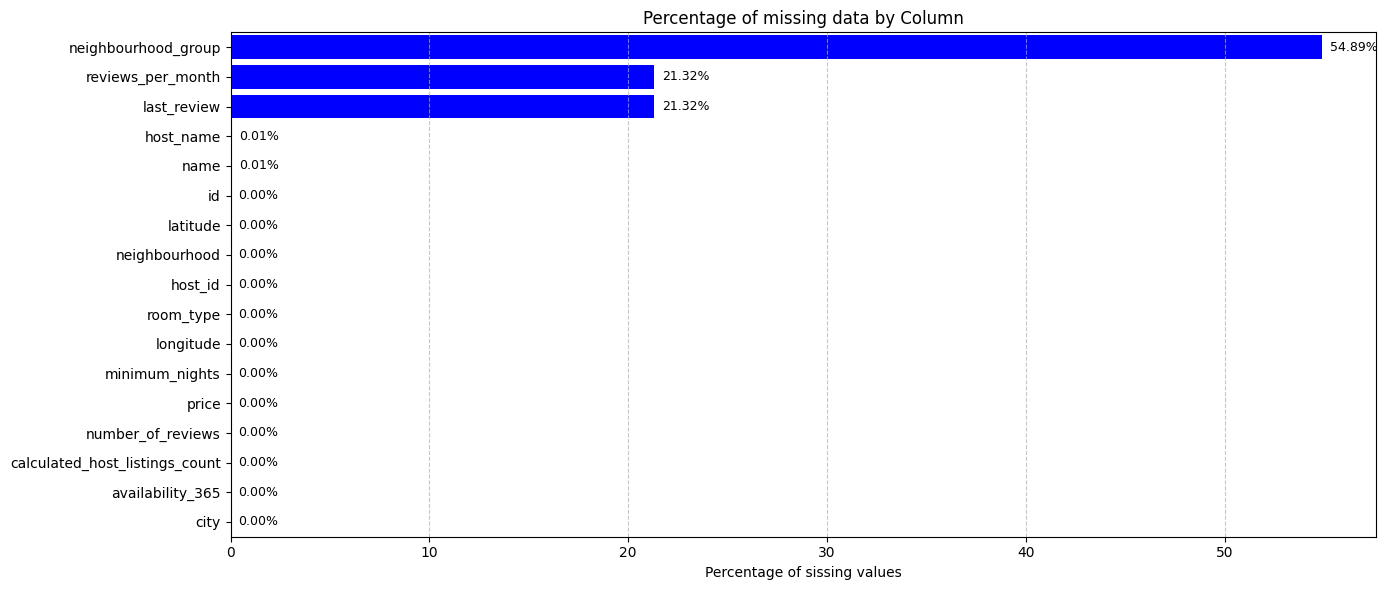

In [13]:
missing_counts = joined_df.isnull().sum()
missing_df = pd.DataFrame({'column': missing_counts.index,
                           'missing_percent': (missing_counts.values/len(joined_df))*100
                           })
missing_df = missing_df.sort_values(by='missing_percent', ascending=False)
plt.figure(figsize=(14, 6))
bars = plt.barh(missing_df['column'], missing_df['missing_percent'], color='blue')
plt.ylim(-0.5, len(missing_df['column']) - 0.5)
plt.xlabel('Percentage of sissing values')
plt.title('Percentage of missing data by Column')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar, percent in zip(bars, missing_df['missing_percent']):
    plt.text(percent + 0.4, bar.get_y() + bar.get_height()/2,
             f'{percent:.2f}%', va='center', fontsize=9)
plt.tight_layout()
plt.show()

In [14]:
cleaned_df = joined_df.dropna()
cleaned_df.shape

(157742, 17)

In [15]:
recleaned_df= joined_df.drop(columns=['neighbourhood_group'])
recleaned_df['reviews_per_month'].fillna(0, inplace=True)
recleaned_df.shape

(458177, 16)

In [16]:
# Checking for the logical consistency of the variables for reasonable ranges
print("Logical Consistency Checks")
# Check 'price' for invalid values
if 'price' in recleaned_df.columns:
    invalid_prices = recleaned_df[recleaned_df['price'] <= 0]
    print(f"Listings with invalid price values (<=0): {len(invalid_prices)}")
# Check 'minimum_nights' for reasonable range
if 'minimum_nights' in recleaned_df.columns:
    print(f"Minimum nights range: {recleaned_df['minimum_nights'].min()} - {recleaned_df['minimum_nights'].max()}")
# Check 'number_of_reviews' for reasonable range
if 'number_of_reviews' in recleaned_df.columns:
    print(f"Number of reviews range: {recleaned_df['number_of_reviews'].min()} - {recleaned_df['number_of_reviews'].max()}")
# Check 'reviews_per_month' for reasonable range
if 'reviews_per_month' in recleaned_df.columns:
    print(f"Reviews per month range: {recleaned_df['reviews_per_month'].min()} - {recleaned_df['reviews_per_month'].max()}")
# Check 'calculated_host_listings_count' for reasonable range
if 'calculated_host_listings_count' in recleaned_df.columns:
    print(f"Host listings count range: {recleaned_df['calculated_host_listings_count'].min()} - {recleaned_df['calculated_host_listings_count'].max()}")
# Check 'availability_365' for reasonable range
if 'availability_365' in recleaned_df.columns:
    print(f"Availability 365 range: {recleaned_df['availability_365'].min()} - {recleaned_df['availability_365'].max()}")
# Check 'latitude' and 'longitude' for geographic bounds
if 'latitude' in recleaned_df.columns:
    print(f"Latitude range: {recleaned_df['latitude'].min()} - {recleaned_df['latitude'].max()}")
if 'longitude' in recleaned_df.columns:
    print(f"Longitude range: {recleaned_df['longitude'].min()} - {recleaned_df['longitude'].max()}")


Logical Consistency Checks
Listings with invalid price values (<=0): 140
Minimum nights range: 1 - 100000000
Number of reviews range: 0 - 3091
Reviews per month range: 0.0 - 101.42
Host listings count range: 1 - 1003
Availability 365 range: 0 - 365
Latitude range: 18.92099 - 47.73462
Longitude range: -159.7149 - -70.99595


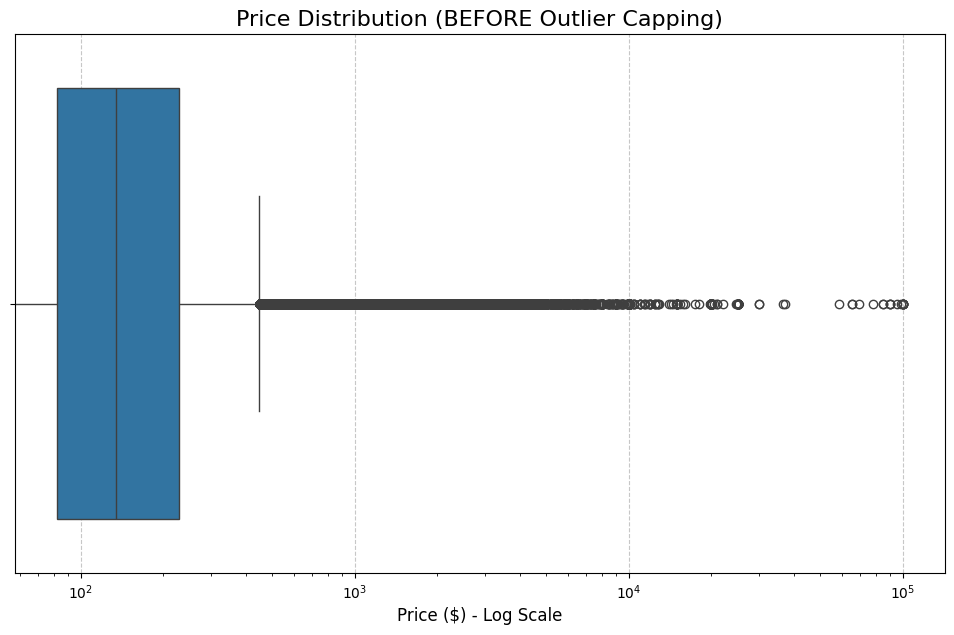

This plot clearly shows the extreme range of prices before capping.


In [17]:
# Creates a boxplot to visualize the price distribution.
plt.figure(figsize=(12, 7))
sns.boxplot(x=recleaned_df['price'])
plt.title('Price Distribution (BEFORE Outlier Capping)', fontsize=16)
plt.xlabel('Price ($) - Log Scale', fontsize=12)

# Using a log scale is Essential, Without it, the outliers are so extreme that the
# "box" part of the plot would be a single, invisible line.
plt.xscale('log')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig('price_outliers_before_fixing.png')
plt.show()
print("This plot clearly shows the extreme range of prices before capping.")

In [18]:
print(f"Shape before outlier handling: {recleaned_df.shape}")

# We must first remove listings with a $0 price, as this is invalid data.
initial_rows = recleaned_df.shape[0]
recleaned_df = recleaned_df[recleaned_df['price'] > 0]
rows_removed = initial_rows - recleaned_df.shape[0]

print(f"   - Removed {rows_removed} listings with $0 price.")

# Handle Extreme Outliers
# Now we filter the "impossible" max values.
# We cap at the 99.5th percentile.
initial_rows = recleaned_df.shape[0]

# Calculate the 99.5th percentile "cap"
price_cap = recleaned_df['price'].quantile(0.995)
nights_cap = recleaned_df['minimum_nights'].quantile(0.995)

print(f"   - Capping 'price' at 99.5th percentile: ${price_cap:,.2f}")
print(f"   - Capping 'minimum_nights' at 99.5th percentile: {nights_cap:.0f} nights")

# Filter the DataFrame to keep only rows *below* or *at* the cap
recleaned_df = recleaned_df[
    (recleaned_df['price'] <= price_cap) &
    (recleaned_df['minimum_nights'] <= nights_cap)
    ]
rows_removed = initial_rows - recleaned_df.shape[0]

print(f"   - Removed {rows_removed} extreme outlier listings.")
print(f"Shape after outlier handling: {recleaned_df.shape}")

Shape before outlier handling: (458177, 16)
   - Removed 140 listings with $0 price.
   - Capping 'price' at 99.5th percentile: $2,674.00
   - Capping 'minimum_nights' at 99.5th percentile: 120 nights
   - Removed 4384 extreme outlier listings.
Shape after outlier handling: (453653, 16)


In [19]:
# Checking for the logical consistency of the variables for reasonable ranges
print("Logical Consistency Checks")
# Check 'price' for invalid values
if 'price' in recleaned_df.columns:
    invalid_prices = recleaned_df[recleaned_df['price'] <= 0]
    print(f"Listings with invalid price values (<=0): {len(invalid_prices)}")
# Check 'minimum_nights' for reasonable range
if 'minimum_nights' in recleaned_df.columns:
    print(f"Minimum nights range: {recleaned_df['minimum_nights'].min()} - {recleaned_df['minimum_nights'].max()}")
# Check 'number_of_reviews' for reasonable range
if 'number_of_reviews' in recleaned_df.columns:
    print(f"Number of reviews range: {recleaned_df['number_of_reviews'].min()} - {recleaned_df['number_of_reviews'].max()}")
# Check 'reviews_per_month' for reasonable range
if 'reviews_per_month' in recleaned_df.columns:
    print(f"Reviews per month range: {recleaned_df['reviews_per_month'].min()} - {recleaned_df['reviews_per_month'].max()}")
# Check 'calculated_host_listings_count' for reasonable range
if 'calculated_host_listings_count' in recleaned_df.columns:
    print(f"Host listings count range: {recleaned_df['calculated_host_listings_count'].min()} - {recleaned_df['calculated_host_listings_count'].max()}")
# Check 'availability_365' for reasonable range
if 'availability_365' in recleaned_df.columns:
    print(f"Availability 365 range: {recleaned_df['availability_365'].min()} - {recleaned_df['availability_365'].max()}")
# Check 'latitude' and 'longitude' for geographic bounds
if 'latitude' in recleaned_df.columns:
    print(f"Latitude range: {recleaned_df['latitude'].min()} - {recleaned_df['latitude'].max()}")
if 'longitude' in recleaned_df.columns:
    print(f"Longitude range: {recleaned_df['longitude'].min()} - {recleaned_df['longitude'].max()}")


Logical Consistency Checks
Listings with invalid price values (<=0): 0
Minimum nights range: 1 - 120
Number of reviews range: 0 - 3091
Reviews per month range: 0.0 - 101.42
Host listings count range: 1 - 1003
Availability 365 range: 0 - 365
Latitude range: 18.92099 - 47.73462
Longitude range: -159.7149 - -70.99595


In [20]:
# Make sure Seaborn style is active
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [21]:
# Summary Statistics
num_cols = ['price', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

print("Summary statistics:")
display(recleaned_df[num_cols].describe().T)

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
price,453653.0,204.808891,244.433563,1.0,82.00,135.0,226.00,2674.00
minimum_nights,453653.0,10.588772,15.192367,1.0,1.00,3.0,29.00,120.00
number_of_reviews,453653.0,38.013607,73.026330,0.0,1.00,8.0,41.00,3091.00
reviews_per_month,453653.0,1.217493,1.724039,0.0,0.05,0.5,1.82,101.42
calculated_host_listings_count,453653.0,23.399131,84.050099,1.0,1.00,2.0,8.00,1003.00
availability_365,453653.0,169.997353,137.687389,0.0,25.00,160.0,316.00,365.00


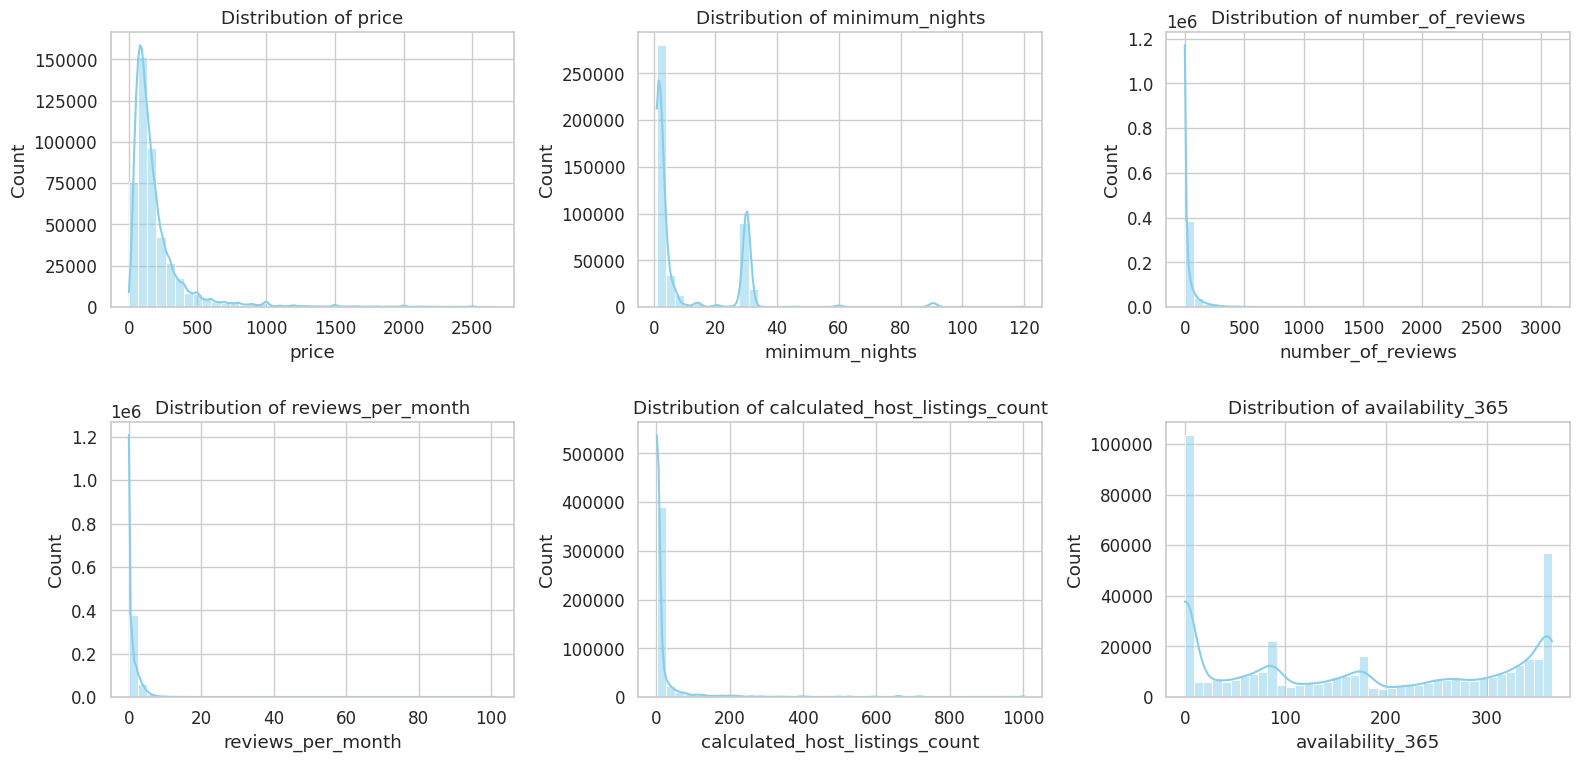

In [22]:
# Univariate Analysis: Distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(recleaned_df[col], bins=40, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

From the output above and from earlier observations, most of the values are skewed to the right. Below we consider a log function of the price for better visibility

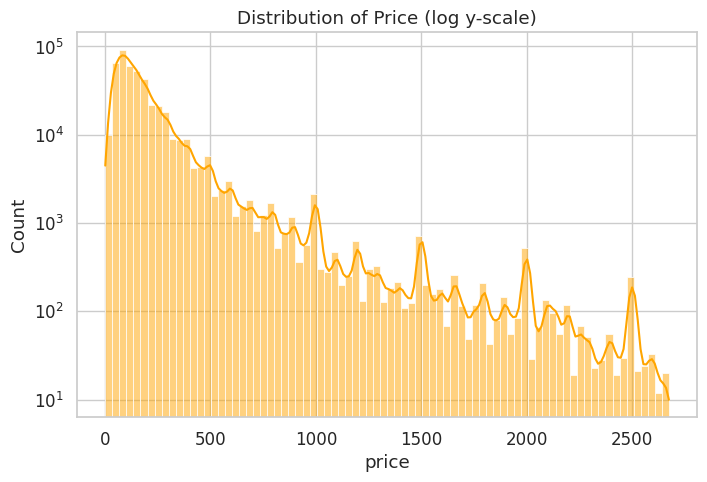

In [23]:
# Distribution of price with log scale for better visibility
plt.figure(figsize=(8,5))
sns.histplot(recleaned_df['price'], bins=80, kde=True, color='orange')
plt.yscale('log')
plt.title('Distribution of Price (log y-scale)')
plt.show()

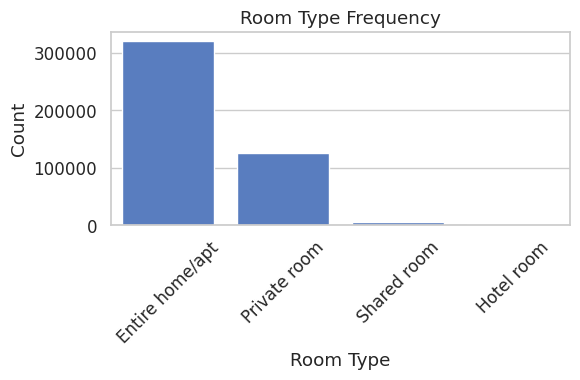

In [24]:
# Room type frequencies
plt.figure(figsize=(6,4))
sns.countplot(data=recleaned_df, x='room_type', order=recleaned_df['room_type'].value_counts().index)
plt.title('Room Type Frequency')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

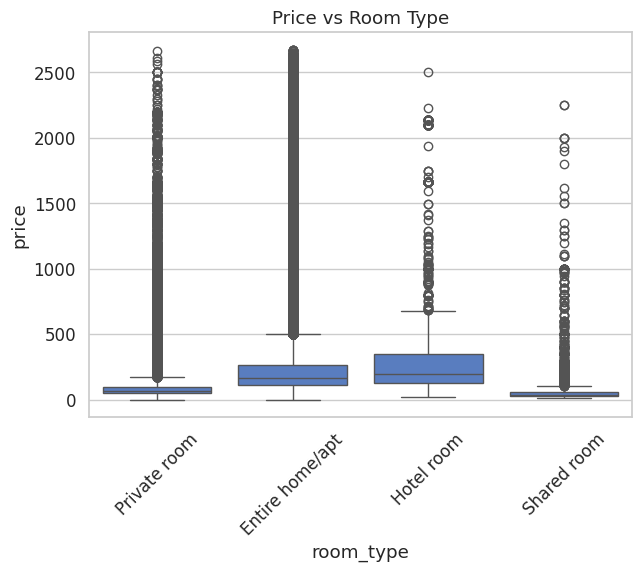

In [26]:
# Bivariate Analysis: Price vs Predictors
# Price vs room type
plt.figure(figsize=(7,5))
sns.boxplot(data=recleaned_df, x='room_type', y='price')
plt.title('Price vs Room Type')
plt.xticks(rotation=45)
plt.show()

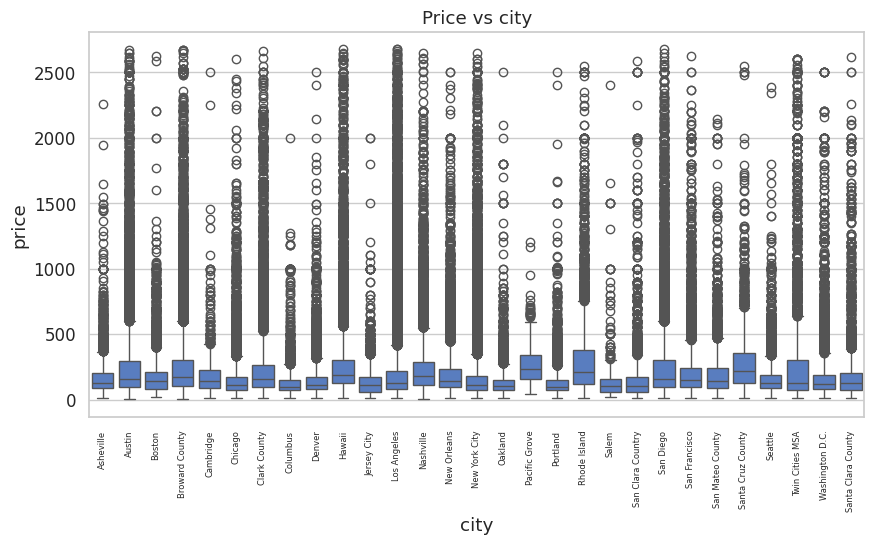

In [27]:
# Price vs neighbourhood group
if 'city' in recleaned_df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=recleaned_df, x='city', y='price')
    plt.title('Price vs city')
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

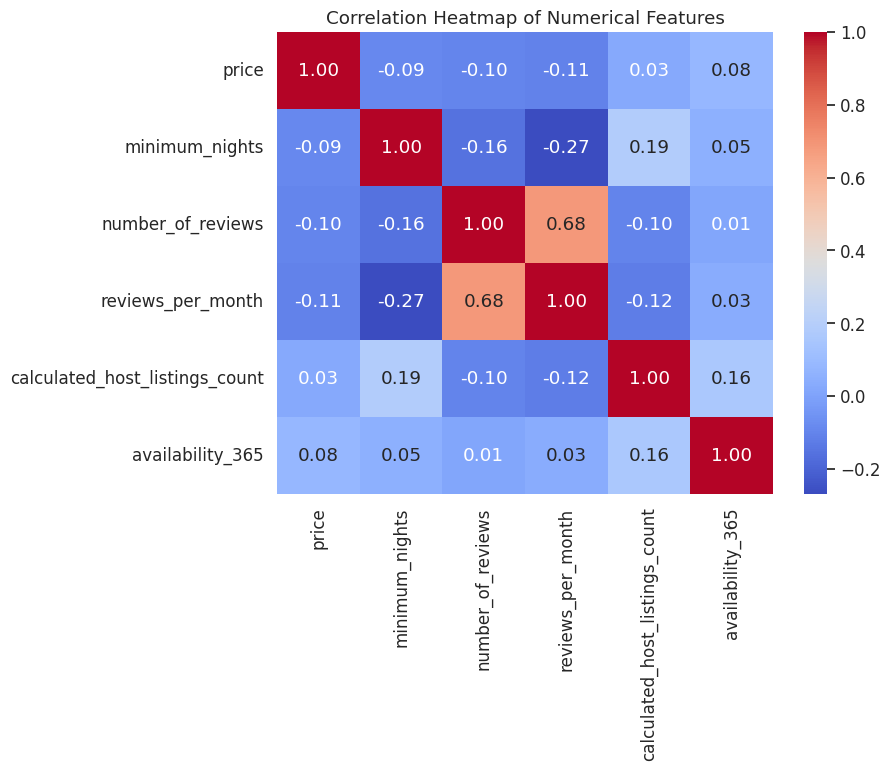

In [29]:
# Correlation heatmap
corr = recleaned_df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
